In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,GRU,LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv("Phishing_Email.csv")
df = df.dropna()
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
df.isna().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(17538, 2)

In [7]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [8]:
df['Email Type'].value_counts()

Email Type
Safe Email        10980
Phishing Email     6558
Name: count, dtype: int64

<Axes: xlabel='Email Type'>

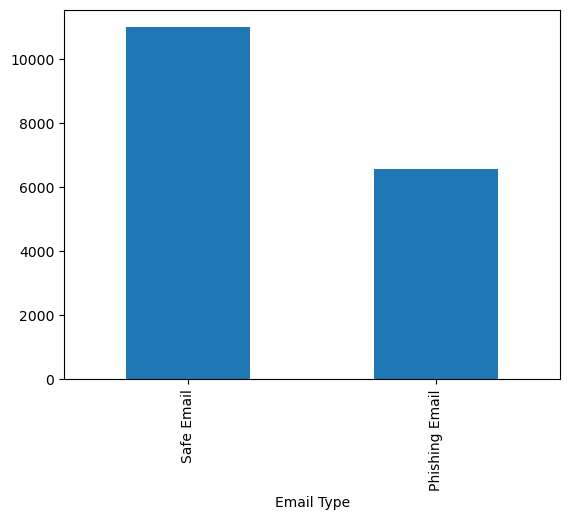

In [9]:
df['Email Type'].value_counts().plot(kind='bar')

In [10]:
lbl = LabelEncoder()
df['Email Type'] = lbl.fit_transform(df['Email Type'])

In [11]:
import re

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df['Email Text']=df['Email Text'].apply(preprocess_text)

In [12]:
df.head()

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


In [14]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 300.2/300.2 kB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


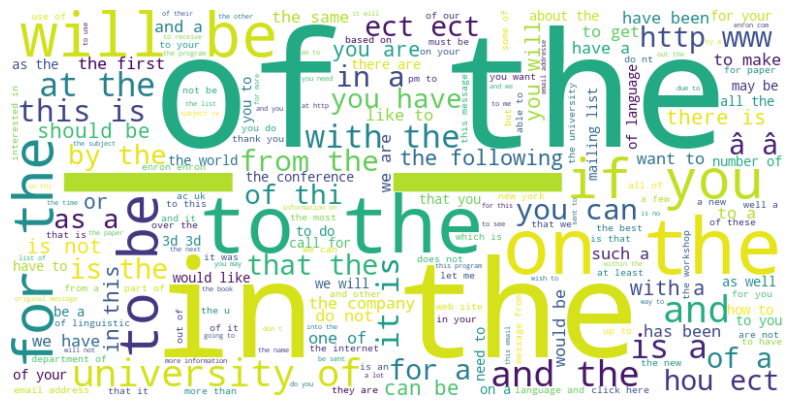

In [15]:
from wordcloud import WordCloud

#combine all rows into a single string
all_mails=" ".join(df['Email Text'])

#create a wordcloud object
word_cloud = WordCloud(stopwords="english",width=800,height=400,background_color='white').generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

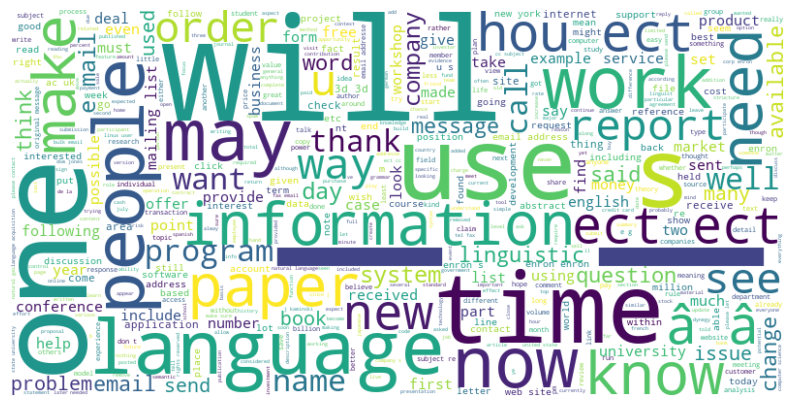

In [16]:
#combine all rows into a single string
all_mails = " ".join(df['Email Text'])

#create a wordcloud object
word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
# passing object
tf = TfidfVectorizer(stop_words='english',max_features=10000) #dimension reduction
feature_x = tf.fit_transform(df['Email Text']).toarray()

In [18]:
y_tf = np.array(df['Email Type']) # convert the label into numpy array

In [19]:
X_tr,X_tst,y_tr,y_tst = train_test_split(feature_x,y_tf,test_size=0.2,random_state=0)

In [20]:
lg = LogisticRegression()
lg.fit(X_tr,y_tr)

pred_lg = lg.predict(X_tst)

97.94754846066135
98.3410138248848
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1351
           1       0.98      0.99      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



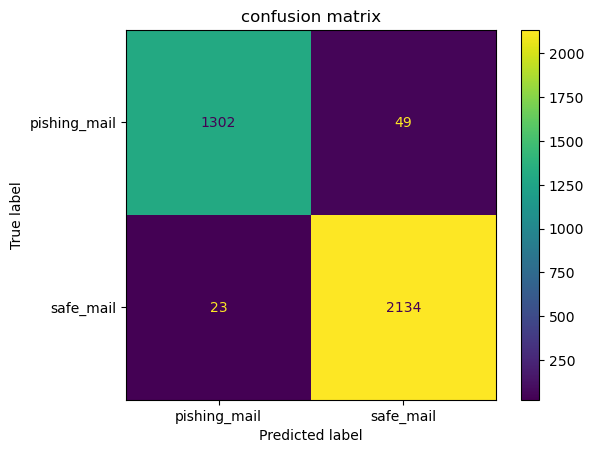

In [22]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(accuracy_score(y_tst,pred_lg)*100)
print(f1_score(y_tst,pred_lg)*100)
print(classification_report(y_tst,pred_lg))

clf_lg = confusion_matrix(y_tst,pred_lg)
cx_ = ConfusionMatrixDisplay(clf_lg,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [26]:
pred_xgb = xgb.predict(X_tst)

97.17787913340935
97.7035490605428
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1351
           1       0.98      0.98      0.98      2157

    accuracy                           0.97      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508



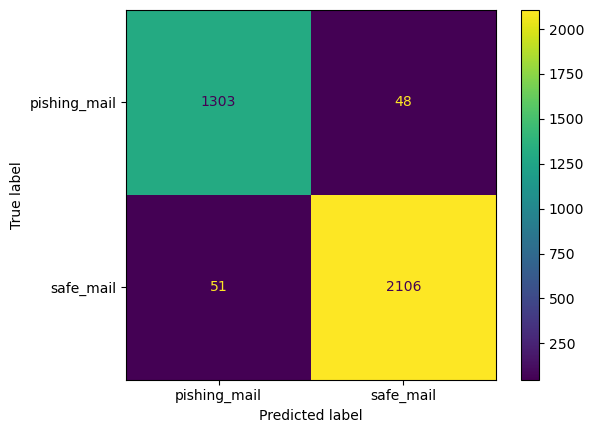

In [27]:
print(accuracy_score(y_tst,pred_xgb)*100)
print(f1_score(y_tst,pred_xgb)*100)
print(classification_report(y_tst,pred_xgb))

#confusion matrix
clf_xgb = confusion_matrix(y_tst,pred_xgb)
cx_ = ConfusionMatrixDisplay(clf_xgb,display_labels=['pishing_mail','safe_mail']).plot()
plt.show()

97.86202964652223
98.25378346915016
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1351
           1       0.99      0.98      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



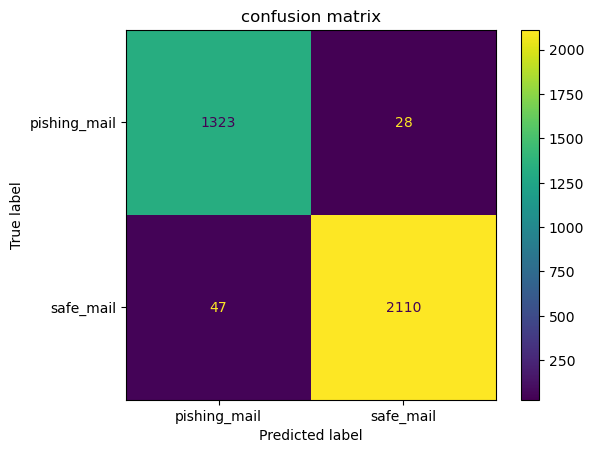

In [28]:
rnf = RandomForestClassifier() #passing object
rnf.fit(X_tr,y_tr)

#prediction
pred_rnf = rnf.predict(X_tst)

#performance
print(accuracy_score(y_tst,pred_rnf)*100)
print(f1_score(y_tst,pred_rnf)*100)
print(classification_report(y_tst,pred_rnf))

#confusion matrix
clf_rnf = confusion_matrix(y_tst,pred_rnf)
cx_ = ConfusionMatrixDisplay(clf_rnf,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()